This project further explores the connection between emoticons and emotion text using some existing lexicons 
and embedding-based analysis. We particularly focus on the eight emotions: anger, anticipation, disgust, fear, 
joy, sadness, surprise, trust. 

1) We consider emoTag1200 dataset EmoTag/data/EmoTag1200-scores.csv at master·abushoeb/EmoTag·GitHub where for each emoticon is assigned scores to each of the above eight emotions based on some 
manual annotation task. Identify a resource where each emoticon is assigned the corresponding text.  

In [13]:
# Emotag scores stored in the "EmoTag1200.csv"-file.
# Each emoji is given an emotion score for the following emotions: Anger, Anticipation, Disgust, Fear, Joy, Sadness, Surprise and Trust.

raw_data = open("EmoTag1200-scores.csv", "r", encoding="Utf-8")
data = []

for line in raw_data:
    row = line.split(",")
    row[10] = row[10][0:-1]
    data.append(row)

#Example of data
for row in data[:6]:
    print(row)

['unicode', 'emoji', 'name', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
['1F308', '🌈', 'rainbow', '0.0', '0.28', '0.0', '0.0', '0.69', '0.06', '0.22', '0.33']
['1F319', '🌙', 'crescent moon', '0.0', '0.31', '0.0', '0.0', '0.25', '0.0', '0.06', '0.25']
['1F31A', '🌚', 'new moon face', '0.06', '0.08', '0.17', '0.06', '0.42', '0.19', '0.06', '0.11']
['1F31E', '🌞', 'sun with face', '0.0', '0.22', '0.0', '0.0', '0.78', '0.0', '0.11', '0.22']
['1F31F', '🌟', 'glowing star', '0.0', '0.28', '0.0', '0.0', '0.53', '0.0', '0.25', '0.31']


2. We want to test the compatibility between the emoticons’ definitions and Tag1200 labeling. For this 
purpose, suggest a script that generates an Embedding vector (i.e., word2vec embedding) of the textual 
definition of a given emoticon. Then, use the same embedding for each for the eight emoticons, and 
calculate the cosine similarity between the embedding of the emoticon’s textual definition and the 
embedding vector of each of the 8 emotion names. This yields an eight dimension vector quantifying the 
similarity to each of the emotions. Finally compute the Pearson correlation coefficient as a measure that 
evaluates the mapping between emoticon definition and Tag1200’s labeling. 

In [14]:
# Similarity between emoji name and the name of the emotions compared to data given similarity between emoji and emotion.

# Create a model for Word2Vec using the brown corpus.
import nltk
from nltk.corpus import brown
from gensim.models import Word2Vec


sentences = brown.sents()
model = Word2Vec(sentences, min_count=1)


The Brown corpus is not big enough mo make a good model for Word2Vec. Most of the emoji names don't appear in the training data or are made up of multiple words, so there are no vector representations for them. Only using words that can be vectorized for analysis.

In [15]:


# Function for determining the similarity between emoji name and the eight emotions
def word2vec_similarity(emoji):
    try:
        values = []
        emotions = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
        # Compute the cosine similarity between each emoji name and emotion
        for emotion in emotions:
            values.append(model.wv.similarity(emoji[2], emotion))

        #print(emoji[2], values)
        return values
    except: # For words that were not mentioned in the training data for the model(brown corpus).
        return 
    
# Calculate a list of all the similarities.
word2vec_similarities = []
for emoji in data[1:]:
    word2vec_similarities.append(word2vec_similarity(emoji))


In [16]:
# Pearson correlation between Word2Vec and EmoTag1200 scores.
from scipy.stats import pearsonr


def pearsonCorrelations(EmoTagdata, similarities):
    correlations = []

    for i,score in enumerate(similarities):

        if score == None:
            continue

        else:
            # Data stored as str in EmoTag1200
            float_data = []

            for value in EmoTagdata[i+1][3:]:
                float_data.append(float(value))
                
            corr, _ = pearsonr(score, float_data)
            correlations.append(corr)
    return correlations

correlations1 = pearsonCorrelations(data, word2vec_similarities)
# Correlations stored in "correlations1"

print(correlations1)
print("Average correlation = ", sum(correlations1)/len(correlations1))

[0.46664561334303195, 0.44591040611882443, 0.253340599442277, 0.43010116749934435, 0.553963000779775, 0.48874988072694303, 0.1445523302463538, 0.240164370300693, 0.39130164245859433, 0.4735035537701142, 0.14407720048910938, -0.04954190496650171, 0.42467322207765135, 0.1884887986821289, 0.448106960218752, 0.3075690608572184, 0.5111831925014731, 0.03536386867555912, 0.3613647417311517, 0.4830061150057569, 0.49676195824555536, 0.4246802568128524]
Average correlation =  0.34836209250075717


3. Repeat the process in 2) when different embedding strategies were employed, e.g., doc2vec, FastText, 
Glove, BERT. Summarize the result in appropriate table and Comment on the findings.       

TODO: Analyze with other embedding strategies.

4. Consider the Twitter dataset available in Kaggle Tweets With Emoji (kaggle.com) where for each emoji 
there are around 20K tweets. Choose 6 emoji of your choice, containing antagonist emoji, e.g., 
happiness and sadness, with their associated 20K tweets. Suggest a script that determines for each emoji 
the 30 most frequent terms in their associated 20K tweet messages. Write down a script that generates a 
matrix showing the number of common wording among the thirty most frequent words identified.  

In [85]:
# Chosen emojis: Egg 🥚, Enraged face 😡, fire 🔥, skull 💀, smiling face 😀, sun ☀️

# Creates a list of words used in tweets for each emoji
import csv
from nltk.tokenize import word_tokenize

stopwords = list(set(nltk.corpus.stopwords.words('english')))
stopwords.append("&amp;")
stopwords.append('')
stopwords.append("\n")

def remove_stopwords(list):
    list = [word for word in list if word.isalpha() and word.lower() not in stopwords]
    return list

def get_tweets(location):
    with open(location, mode ='r', encoding="UTF-8")as file:
        open_file = csv.reader(file)
        words = []
        tweets = []
        for line in open_file:
            words += line[0].split(" ")
            tweets.append(line[0])

        words = remove_stopwords(words)
    return words, tweets


egg_words, egg_tweets = get_tweets('Tweets/egg.csv')

enraged_face_words, enraged_face_tweets = get_tweets('Tweets/enraged_face.csv')

fire_words, fire_tweets = get_tweets('Tweets/fire.csv')

skull_words, skull_tweets = get_tweets('Tweets/skull.csv')

smiling_face_words, smiling_face_tweets = get_tweets('Tweets/smiling_face.csv')

sun_words, sun_tweets = get_tweets('Tweets/sun.csv')



In [86]:
import collections

def top_30_words(list):
    for i, word in enumerate(list):
        list[i] = word.lower()
    top_30 = collections.Counter(list).most_common(30)
    for i, word in enumerate(top_30):
        top_30[i] = word[0]
    return top_30

top_egg = top_30_words(egg_words)
top_enraged_face = top_30_words(enraged_face_words)
top_fire = top_30_words(fire_words)
top_skull = top_30_words(skull_words)
top_smiling_face = top_30_words(smiling_face_words)
top_sun = top_30_words(sun_words)

# Top 30 most common words used it tweets for each emoji:
print("🥚", top_egg)
print("😡", top_enraged_face)
print("🔥", top_fire)
print("💀", top_skull)
print("😀", top_smiling_face)
print("☀️", top_sun)



🥚 ['easter', 'happy', 'egg', 'eggs', 'day', 'good', 'hope', 'filled', 'everyone', 'wishing', 'time', 'weekend', 'us', 'may', 'sunday', 'get', 'new', 'great', 'family', 'love', 'one', 'chocolate', 'hunt', 'morning', 'like', 'thank', 'wonderful', 'bunny', 'enjoy', 'celebrate']
😡 ['like', 'get', 'people', 'one', 'even', 'would', 'know', 'go', 'want', 'never', 'see', 'need', 'time', 'us', 'still', 'u', 'got', 'going', 'stop', 'make', 'think', 'back', 'really', 'say', 'right', 'take', 'hate', 'way', 'good', 'man']
🔥 ['one', 'like', 'love', 'see', 'get', 'time', 'good', 'first', 'happy', 'go', 'easter', 'know', 'got', 'fire', 'new', 'back', 'best', 'great', 'going', 'game', 'day', 'thank', 'really', 'make', 'want', 'check', 'would', 'us', 'need', 'way']
💀 ['like', 'even', 'one', 'get', 'know', 'people', 'bro', 'got', 'think', 'u', 'see', 'would', 'literally', 'really', 'said', 'time', 'shit', 'still', 'go', 'way', 'never', 'say', 'gonna', 'make', 'want', 'going', 'back', 'good', 'also', 'lov

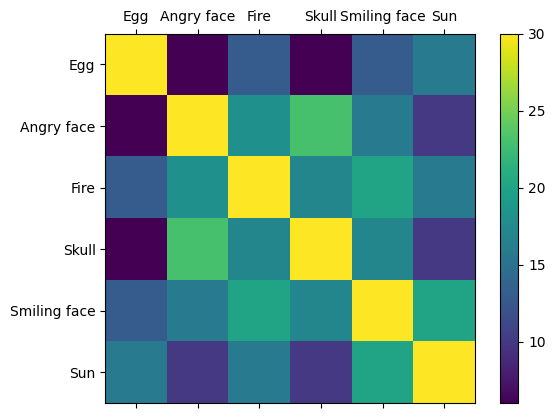

In [ ]:
# Matrix showing the common words between each tweet category:
top_lists = [top_egg, top_enraged_face, top_fire, top_skull, top_smiling_face, top_sun]
matrix = []
for list1 in top_lists:
    matrix_line = []
    for list2 in top_lists:
        matrix_line.append(sum(word in list1 for word in list2)) # counts common words between lists
    matrix.append(matrix_line)



import matplotlib.pyplot as plt

labels = ["Egg", "Angry face","Fire","Skull","Smiling face","Sun"]

figure = plt.figure()
axes = figure.add_subplot(111)
 

caxes = axes.matshow(matrix, interpolation ='nearest')
figure.colorbar(caxes)
 
axes.set_xticklabels(['']+labels)
axes.set_yticklabels(['']+labels)
 
plt.show()

5. Write a script that inputs the 20K tweet messages for each emoji and outputs the embedding vector using DistilBERT. 
Then use the available TSNE and its scikit-learn implementation TSNE — scikit-learn 
1.5.2 documentation to project each embedding vector into a 2D space. Finally, draw in a 2D space the 
corresponding the result of each of the six emojis. Comment on the proximity between these emojis 
based on the expected intuition behind each emoiji.   

In [70]:
from transformers import DistilBertTokenizer, DistilBertModel
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
distilBert = DistilBertModel.from_pretrained("distilbert-base-uncased")

In [88]:
# Create the embedding for the entirety of the tweets containing a specific emoji. 
from torch import no_grad



def createEmbedding(text):

    inputs = tokenizer(text, return_tensors='pt', max_length=512, truncation=True, padding=True)


    with no_grad():
        outputs = distilBert(**inputs).last_hidden_state#.mean(dim=2)
    #outputs = outputs / outputs.norm(dim=1)
    return outputs



egg_embedding = createEmbedding(" ".join(egg_words))
enraged_face_embedding = createEmbedding(" ".join(enraged_face_words))
fire_embedding = createEmbedding(" ".join(fire_words))
skull_embedding = createEmbedding(" ".join(skull_words))
smiling_face_embedding = createEmbedding(" ".join(smiling_face_words))
sun_embedding = createEmbedding(" ".join(sun_words))


#cosine_similarity(createEmbedding(" ".join(egg_words)),createEmbedding(" ".join(smiling_face_words)))

In [89]:
# 2D representation of the embedding
from sklearn.manifold import TSNE
import numpy as np

tsne = TSNE(n_components=2, random_state=42)

flat_egg = np.mean(tsne.fit_transform(egg_embedding[0].numpy()), axis=0)
flat_enraged_face = np.mean(tsne.fit_transform(enraged_face_embedding[0].numpy()), axis=0)
flat_fire = np.mean(tsne.fit_transform(fire_embedding[0].numpy()), axis=0)
flat_skull = np.mean(tsne.fit_transform(skull_embedding[0].numpy()), axis=0)
flat_smiling_face = np.mean(tsne.fit_transform(smiling_face_embedding[0].numpy()), axis=0)
flat_sun = np.mean(tsne.fit_transform(sun_embedding[0].numpy()), axis=0)

#flat_egg = flat_egg[:, :2]
#def transform

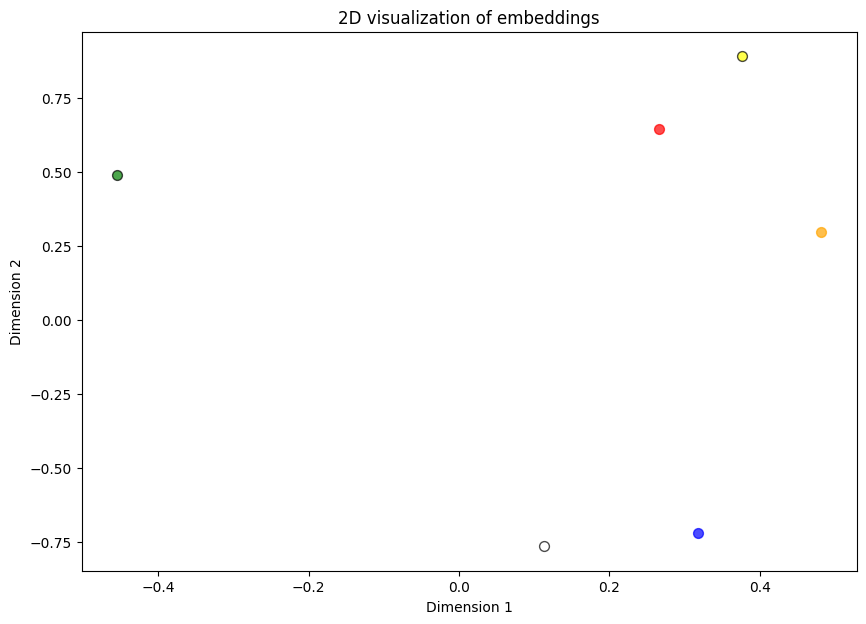

In [129]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7))
plt.scatter(flat_egg[0],flat_egg[1], s=50, alpha=0.7,color="green",edgecolors="black")
plt.scatter(flat_enraged_face[0], flat_enraged_face[1], s=50, alpha=0.7,color="red")
plt.scatter(flat_fire[0], flat_fire[1], s=50, alpha=0.7,color="orange")
plt.scatter(flat_skull[0], flat_skull[1], s=50, alpha=0.7,color="white",edgecolors="black")
plt.scatter(flat_smiling_face[0], flat_smiling_face[1], s=50, alpha=0.7,color="blue")
plt.scatter(flat_sun[0], flat_sun[1], s=50, alpha=0.7,color="yellow", edgecolors="black")
plt.title("2D visualization of embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

6. Repeat 5) when the embedding is constructed using the Empath categorization 
https://github.com/Ejhfast/empath-client for each emoji, and draw the corresponding 2D plot where each 
emoji is represented as a point in the graph.  


In [91]:
from empath import Empath
lexicon = Empath()


In [92]:
def empath_embedding(word_list):
    embedding = np.array([*lexicon.analyze(word_list, normalize=True).values()])
    embedding = np.array(np.split(embedding, 2))
    return np.mean(tsne.fit_transform(embedding.transpose()), axis=0)

empath_egg = empath_embedding(egg_tweets)
empath_enraged_face = empath_embedding(enraged_face_tweets)
empath_fire = empath_embedding(fire_tweets)
empath_skull = empath_embedding(skull_tweets)
empath_smiling_face = empath_embedding(smiling_face_tweets)
empath_sun = empath_embedding(sun_tweets)

#flat_empath_egg = np.mean(tsne.fit_transform(empath_egg), axis=0)

#print(empath_egg)

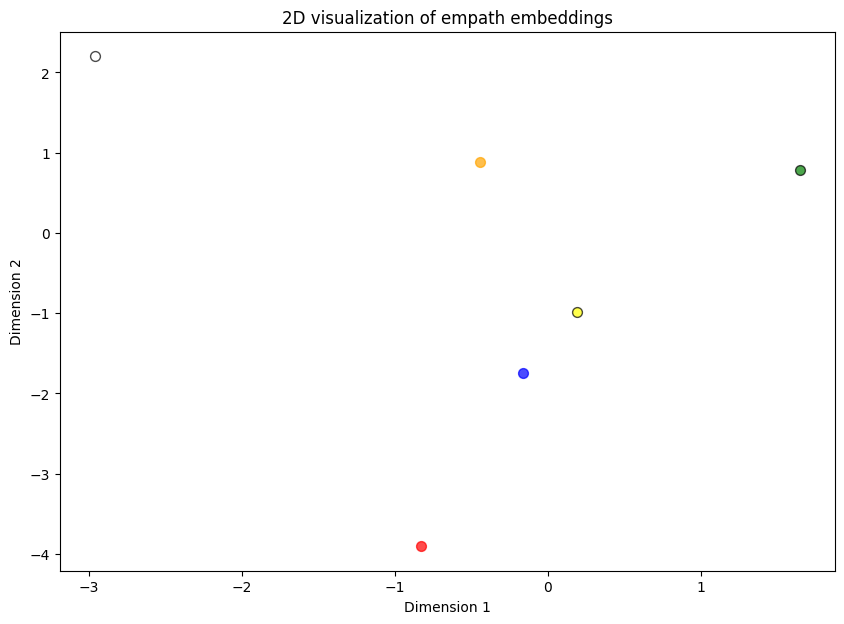

In [130]:
plt.figure(figsize=(10, 7))
plt.scatter(empath_egg[0],empath_egg[1], s=50, alpha=0.7,color="green",edgecolors="black")
plt.scatter(empath_enraged_face[0], empath_enraged_face[1], s=50, alpha=0.7,color="red")
plt.scatter(empath_fire[0], empath_fire[1], s=50, alpha=0.7,color="orange")
plt.scatter(empath_skull[0], empath_skull[1], s=50, alpha=0.7,color="white",edgecolors="black")
plt.scatter(empath_smiling_face[0], empath_smiling_face[1], s=50, alpha=0.7,color="blue")
plt.scatter(empath_sun[0], empath_sun[1], s=50, alpha=0.7,color="yellow", edgecolors="black")
plt.title("2D visualization of empath embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

7. Instead of using the Empath categorization, we want to use topic modelling to handle the category
record matching. For this purpose, write a script that uses LDA topic modelling with one topic and 8 
words per topic. For each emoiji labelled datata (20K tweet messages), we would like to investigate this 
matching by studying the mapping between the six keywords generated by the LDA and the 
corresponding labelled emoji. Suggest an approach that would allow you to match between the eight 
generated keywords and the emoji label in view of emoTag construction. For instance, assume the 
output of LDA is keywords K1, K2,.., K8, and assume the emoji G has weight vector [x1, x2, x3, …, x8]  
Emoji_weight = ∑ 𝑥𝑖 𝑖∈𝐼 where I stands for the set of keywords among K1-K8 that coincide with 
keywords generated by LDA scheme. 

In [96]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


cv = CountVectorizer(max_df=0.9,min_df=2, stop_words='english')
lda = LatentDirichletAllocation(n_components=1,random_state=0)

def create_lda_fit(word_list):
    dtm  = cv.fit_transform(word_list)
    lda_fit  = lda.fit(dtm)
    return lda_fit


In [99]:
def print_top_n_words(lda_fit, n):
    for id_value, value in enumerate(lda_fit.components_):
        print([cv.get_feature_names_out()[index] for index in value.argsort()[-n:]])
        print()

print_top_n_words(create_lda_fit(egg_tweets),8)
print_top_n_words(create_lda_fit(enraged_face_tweets),8)
print_top_n_words(create_lda_fit(fire_tweets),8)
print_top_n_words(create_lda_fit(skull_tweets),8)
print_top_n_words(create_lda_fit(smiling_face_tweets),8)
print_top_n_words(create_lda_fit(sun_tweets),8)

['hope', 'happyeaster', 'day', 'eggs', 'egg', 'happy', 'https', 'easter']

['know', 'time', 'amp', 'don', 'people', 'like', 'just', 'https']

['easter', 'don', 'time', 'amp', 'love', 'like', 'just', 'https']

['got', 'people', 'know', 'bro', 'don', 'just', 'https', 'like']

['happy', 'love', 'day', 'just', 'like', 'good', 'thank', 'https']

['happy', 'tuesday', 'great', 'gm', 'morning', 'good', 'day', 'https']



8. Instead of using LDA, we use another state-of-the-art topic modelling technique based on transformer: 
BerTopic, see https://github.com/MaartenGr/BERTopic. Study the example provided in github and 
suggest how you will proceed to imitate the reasoning of 7) to test how BERTopic generated topics can 
be matched with emoTag labelling. Use the illustration provided in BERTopic to draw the result of this 
topic modelling. Summarize the result in a table.

In [ ]:
# WARNING running this part might take over 10 minutes

from bertopic import BERTopic

def bertopic_table(tweets):
    topic_model = BERTopic()
    topics, probs = topic_model.fit_transform(tweets)
    return topics, probs, topic_model

# Create topic models for each emoji category
egg_topics, egg_probs, egg_topic_model = bertopic_table(egg_tweets)
enraged_face_topics, enraged_face_probs, enraged_face_topic_model = bertopic_table(enraged_face_tweets)
fire_topics, fire_probs, fire_topic_model = bertopic_table(fire_tweets)
skull_topics, skull_probs, skull_topic_model = bertopic_table(skull_tweets)
smiling_face_topics, smiling_face_probs, smiling_face_topic_model = bertopic_table(smiling_face_tweets)
sun_topics, sun_probs, sun_topic_model = bertopic_table(sun_tweets)

In [ ]:
egg_topic_model.get_topic_info()


,Topic,Count,Name,Representation,Representative_Docs
0,-1,10375,-1_you_the_to_and,"[you, the, to, and, this, is, that, of, for, it]",[@LanternFace They will try … but as the times...
1,0,319,0_show_watch_movie_theatre,"[show, watch, movie, theatre, episode, netflix...",[@thismorning @VanessaOnAir Seriously hope the...
2,1,296,1_easter_happy_eggs_sunday,"[easter, happy, eggs, sunday, egg, bunny, bask...","[These are your easter eggs!!! 😡, Happy easter..."
3,2,269,2_gtbank_app_bank_scam,"[gtbank, app, bank, scam, gtbankhelp, card, mo...","[@gtbank what’s wrong with your app na 😡, @the..."
4,3,240,3_women_trans_men_woman,"[women, trans, men, woman, gender, sports, wom...",[Hell yes !!..the only reason men want to comp...
...,...,...,...,...,...
199,198,10,198_robertson_linesman_elbowed_throat,"[robertson, linesman, elbowed, throat, andy, a...",[@talkSPORT Robertson is a big baby and he gra...
200,199,10,199_chris_mrbeast_maddox63333433_mcphils,"[chris, mrbeast, maddox63333433, mcphils, dani...",[@LilyPichu @chris @MrBeast I was about to com...
201,200,10,200_breitbartnews_worthless_media_4humanunity,"[breitbartnews, worthless, media, 4humanunity,...",[@OmarRiverosays And yet @Twitter often warns ...
202,201,10,201_coors_budget_price_500k,"[coors, budget, price, 500k, light, receipt, m...","[i want 500k budget for shopping spree😡, @jess..."


In [114]:
enraged_face_topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10375,-1_you_the_to_and,"[you, the, to, and, this, is, that, of, for, it]",[@LanternFace They will try … but as the times...
1,0,319,0_show_watch_movie_theatre,"[show, watch, movie, theatre, episode, netflix...",[@thismorning @VanessaOnAir Seriously hope the...
2,1,296,1_easter_happy_eggs_sunday,"[easter, happy, eggs, sunday, egg, bunny, bask...","[These are your easter eggs!!! 😡, Happy easter..."
3,2,269,2_gtbank_app_bank_scam,"[gtbank, app, bank, scam, gtbankhelp, card, mo...","[@gtbank what’s wrong with your app na 😡, @the..."
4,3,240,3_women_trans_men_woman,"[women, trans, men, woman, gender, sports, wom...",[Hell yes !!..the only reason men want to comp...
...,...,...,...,...,...
199,198,10,198_robertson_linesman_elbowed_throat,"[robertson, linesman, elbowed, throat, andy, a...",[@talkSPORT Robertson is a big baby and he gra...
200,199,10,199_chris_mrbeast_maddox63333433_mcphils,"[chris, mrbeast, maddox63333433, mcphils, dani...",[@LilyPichu @chris @MrBeast I was about to com...
201,200,10,200_breitbartnews_worthless_media_4humanunity,"[breitbartnews, worthless, media, 4humanunity,...",[@OmarRiverosays And yet @Twitter often warns ...
202,201,10,201_coors_budget_price_500k,"[coors, budget, price, 500k, light, receipt, m...","[i want 500k budget for shopping spree😡, @jess..."


In [115]:
fire_topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10074,-1_to_you_the_this,"[to, you, the, this, it, and, is, that, of, my]","[Y’all going to hell right with me 💀🔥, My son ..."
1,0,438,0_cooking_cook_food_chicken,"[cooking, cook, food, chicken, cooked, cheese,...","[We cooking them good 😂🔥, // THEY ARE COOKING ..."
2,1,370,1_arsenal_mufc_goal_liverpool,"[arsenal, mufc, goal, liverpool, plz, league, ...","[@TheFarm_Peter Top from Arsenal 🔥👏👏👏, Still c..."
3,2,180,2_she_her_bitch_naturally,"[she, her, bitch, naturally, love, me, girl, s...","[She really ate her up 😭, Just about her 🌚🌚🌚, ..."
4,3,174,3_jesus_god_christ_resurrection,"[jesus, god, christ, resurrection, amen, churc...","[The cross, the death and resurrection of Jesu..."
...,...,...,...,...,...
235,234,10,234_film_defined_trailer_sw,"[film, defined, trailer, sw, mitb, cinema, dis...","[👉 ""Internationally, #JohnWick4 's totals are ..."
236,235,10,235_yunhi_werent_couples_terebin,"[yunhi, werent, couples, terebin, scenes, woul...",[Seojin &amp; Sunghan♥️\n\nI’m a sucker for pl...
237,236,10,236_gangs_lagos_gangsoflagos_nollywood,"[gangs, lagos, gangsoflagos, nollywood, zlatan...",[Gangs of Lagos has to be my best Nollywood th...
238,237,10,237_marry_married_lve_youuu,"[marry, married, lve, youuu, husband, beloved,...",[@sheikelom This is the kind of man I want to ...


In [116]:
skull_topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10699,-1_the_you_to_and,"[the, you, to, and, this, that, is, it, of, in]",[Being called a paperhand is the most hilariou...
1,0,722,0_song_album_music_songs,"[song, album, music, songs, rap, listen, kpop,...",[@MissMBearTwitch @nfrealmusic I only like 1 s...
2,1,316,1_madrid_madridxtra_chelsea_barca,"[madrid, madridxtra, chelsea, barca, league, v...",[@MadridXtra Bro said the league was not over ...
3,2,272,2_eat_food_eating_cooking,"[eat, food, eating, cooking, cals, ate, meat, ...",[@666rettiwtkcuf If I can I use my ebt because...
4,3,265,3_this_fuck_what_oh,"[this, fuck, what, oh, actually, deep, yall, i...","[what the fuck is this take 💀, What's this💀💀💀,..."
...,...,...,...,...,...
171,170,10,170_speed_feats_slow_clover,"[speed, feats, slow, clover, emphasize, slowed...",[// A literal Flash level speed feat that peop...
172,171,10,171_cosplay_cosplays_imperialbutt_law,"[cosplay, cosplays, imperialbutt, law, followe...",[@ImperialButt I saw you right at the end!!!! ...
173,172,10,172_davescrivener_lomlom27_garfieldcomfy_fully...,"[davescrivener, lomlom27, garfieldcomfy, fully...",[@inkdup92 @nflandhotdfan i thought so but i j...
174,173,10,173_amp_customers_homeless_problems,"[amp, customers, homeless, problems, extra, tr...",[Go to pick up my last delivery for my job at ...


In [117]:
smiling_face_topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10568,-1_the_to_and_you,"[the, to, and, you, it, my, is, for, that, of]","[Those who are coming (to Embujo), those who a..."
1,0,527,0_thank_much_you_thanks,"[thank, much, you, thanks, so, very, youuuu, a...","[@newi_6th Thank you ☺️, @lord_MD16 Thank you ..."
2,1,324,1_felix_wolfhowlharmony_aois_lcore,"[felix, wolfhowlharmony, aois, lcore, oneacesh...","[OMG, this varied tit just visited my Bird Bud..."
3,2,310,2_eat_food_cheese_delicious,"[eat, food, cheese, delicious, dinner, meal, b...",[This weeks meal prep ☺️☝🏾 \nBreakfast: fruit ...
4,3,306,3_easter_monday_happy_gorgeous,"[easter, monday, happy, gorgeous, hello, most,...","[Happy Easter Monday y'all ☺️, HAPPY EASTER 🐣 ..."
...,...,...,...,...,...
184,183,11,183_daddy_peterobi_president_daddyjsmoove,"[daddy, peterobi, president, daddyjsmoove, vaw...","[@PeterObi My president called him ""DADDY"" ☺️😂..."
185,184,10,184_egg_eggs_hatched_weissenhasen,"[egg, eggs, hatched, weissenhasen, susannewcom...",[@BimbleWizard @IAmARealMage Counterpoint: Egg...
186,185,10,185_face_eye_faces_httpstco3s5qzmtm51,"[face, eye, faces, httpstco3s5qzmtm51, nutttt,...","[it might be with your face, but not your insi..."
187,186,10,186_shirl83949594_shirl_vermilviathan_hyunsooj...,"[shirl83949594, shirl, vermilviathan, hyunsooj...",[@WonderW97800751 I'd get a second opinion -\n...


In [118]:
sun_topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,9528,-1_the_to_you_and,"[the, to, you, and, for, is, in, my, it, of]","[@zentreya You too, rest up and stay safe❤️‍🔥...."
1,0,477,0_gm_web3_everyone_fam,"[gm, web3, everyone, fam, say, legends, back, ...","[Gm gm, happy Tuesday ☕️☀️, Gm web3☀️\n\nHave ..."
2,1,462,1_morning_good_marvinh03240182_juststacie5683,"[morning, good, marvinh03240182, juststacie568...","[@CollinaCleo_nft Good morning ☀️🧡, @dds_lil_a..."
3,2,431,2_morning_day_good_wonderful,"[morning, day, good, wonderful, hope, have, gr...","[@IAmBen_E Good morning have a great day ☀️❤️,..."
4,3,316,3_eat_food_tea_delicious,"[eat, food, tea, delicious, ice, breakfast, fr...",[[230410] 23:22 — ☀️\n\nhi\n\n🙌🙌\n\ni’m\n\nlyi...
...,...,...,...,...,...
186,185,10,185_speedy_recovery_maridaje_stuffprobably,"[speedy, recovery, maridaje, stuffprobably, in...",[@naybethdiaz I'm not taking all that by mysel...
187,186,10,186_loss_sorry_nitramyesnahh_smithannyona,"[loss, sorry, nitramyesnahh, smithannyona, for...",[@LaughOutLander I’m so sorry for your loss Ka...
188,187,10,187_brother_auphibrahim_wench2043_wench,"[brother, auphibrahim, wench2043, wench, jbrew...","[@neemart34 Gm brother 🖤☀️, @JBrewer77 GM brot..."
189,188,10,188_wanna_walk_walking_morningjogging,"[wanna, walk, walking, morningjogging, ultraru...",[I’m gonna work from home and omg i don’t wann...


9. We want to study the reverse process from text to emoji. For this purpose, study the existing MIT
DeepMoji project https://github.com/huggingface/torchMoji where for a given textual post, an
automatically generated emoji is outputted. Suggest a script that output for each tweet the corresponding
emoji. Next, we want to use to this approach to evaluate the result with respect to the emoji label. For
this purpose, for the 20K tweets associated with a given emoji label, say, G, calculate the proportion of
emoji G generated by DeepMoiji. Summarize the result in a table showing the proportion of matching
for each class.

10. We want to explore the antagonism relationship to perform another evaluation using NLP modules,
building on the assumption that such a relation should yield disparate evidence. For this purpose,
consider dataframe corresponding to two antagonist emoji (e.g., sadness and happiness), and consider
again the set of 20 most frequent terms of each dataframe, excluding stopwords and uncommon
characters, say H1 and H2 (sadness and happiness), and then we want to evaluate the proportion of
words between the two sets H1 and H2 that are linked through antonymy relation. Suggest a script that
enables you to implement this reasoning using wordnet or any lexical database of your choice. 

In [131]:
# Get list of antonyms for top 20 most common words for emojis and compare them to the words of the opposite emoji. How many common words do they have?

from nltk.corpus import wordnet

# Gives a list of antonyms for the given word
def get_antonyms(word):
    antonyms = []
    for synonyms in wordnet.synsets(word):
        for lm in synonyms.lemmas():
            if lm.antonyms():
                antonyms.append(lm.antonyms()[0].name())
    return antonyms

#Antagonistic emojis: Smiling face 😀 and Enraged face 😡

# Smiling face antonyms for top 20 words:
smily_antonyms = []
for word in top_smiling_face[:20]:
    for antonym in get_antonyms(word):
        if antonym not in smily_antonyms:
            smily_antonyms.append(antonym)

print("Antonyms for tweet words with a smiling face:", smily_antonyms)

# Smiling face antonyms that appear in the top 20 words of the enraged face emoji
common_words = []
for antonym in smily_antonyms:
    if antonym in top_enraged_face[:20]:
        common_words.append(antonym)

print(common_words)

# Enraged face antonyms for top 20 words:
angry_antonyms = []
for word in top_enraged_face[:20]:
    for antonym in get_antonyms(word):
        if antonym not in angry_antonyms:
            angry_antonyms.append(antonym)
print("Antonyms for tweet words with an enraged face:", angry_antonyms)

# Enraged face antonyms that appear in the top 20 words of the Smiling face emoji
common_words = []
for antonym in angry_antonyms:
    if antonym in top_smiling_face[:20]:
        common_words.append(antonym)
print(common_words)

#Antonyms that appear in the top 20 words for both emojis
common_antonyms = []
for antonym in angry_antonyms:
    if antonym in smily_antonyms:
        common_antonyms.append(antonym)
print("Antonyms, both emojis have in common: ", common_antonyms)

Antonyms for tweet words with a smiling face: ['evil', 'evilness', 'bad', 'badness', 'ill', 'dislike', 'unlike', 'unalike', 'hate', 'night', 'unhappy', 'leave', 'take_away', 'end', 'despair', 'little', 'ignore', 'never', 'sunset']
['never']
Antonyms for tweet words with an enraged face: ['dislike', 'unlike', 'unalike', 'leave', 'take_away', 'end', 'odd', 'uneven', 'ignore', 'stay_in_place', 'come', 'malfunction', 'be_born', 'stop', 'no-go', 'ever', 'obviate', 'agitate', 'louden', 'moving', 'sparkling', 'no_longer', 'continuant_consonant', 'start', 'continue', 'begin', 'unmake', 'break']
[]
Antonyms, both emojis have in common:  ['dislike', 'unlike', 'unalike', 'leave', 'take_away', 'end', 'ignore']


11. Use appropriate literature to comment on the findings. Also, identify any additional input that would
allow you to further elucidate any of the preceding, and use appropriate literature of corpus linguistic
literature to justify your findings and comment on the obtained results. Finally, comment on the
limitations and structural weakness of the data processing pipeline. 